In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
x = 6*np.random.rand(200, 1) -3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)

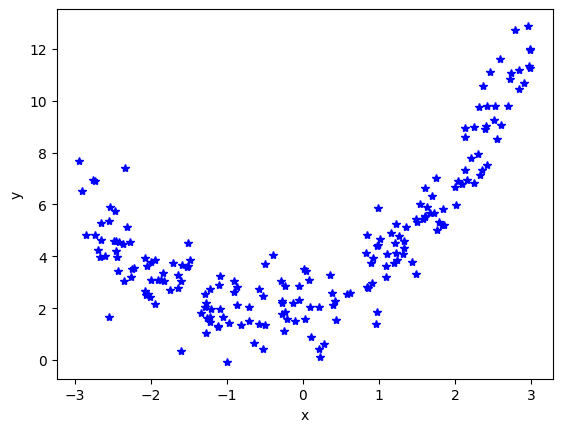

In [23]:
plt.plot(x,y,'b*')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 2)

In [6]:
#applying linear regression
lr = LinearRegression()


In [7]:
lr.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.23771033885544668


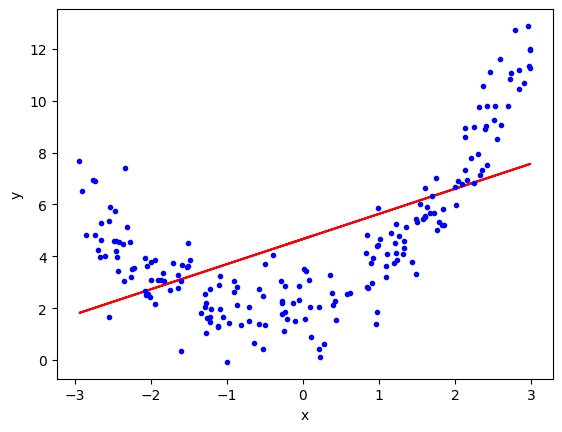

In [13]:
plt.plot(x_train, lr.predict(x_train), color = 'r')
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
#applying polynomial Linear Regression
#degree 2
poly = PolynomialFeatures(degree = 2, include_bias = True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [15]:
print(x_train[0])
print(x_train_trans[0])

[-0.21077717]
[ 1.         -0.21077717  0.04442701]


In [16]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [18]:
print(lr.coef_)
print(lr.intercept_)


[[0.         0.91251414 0.77924383]]
[2.13400323]


In [21]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)


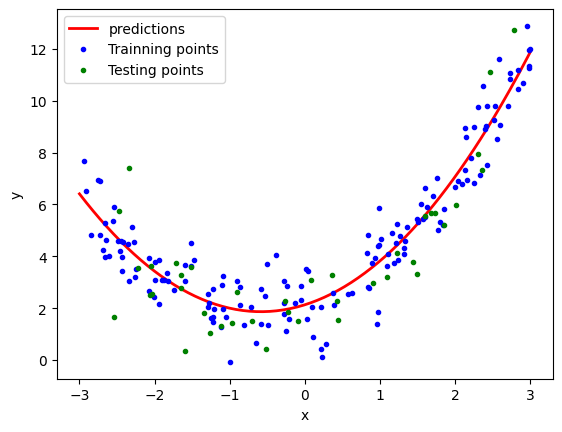

In [22]:
plt.plot(x_new, y_new, "r-", linewidth = 2, label = "predictions")
plt.plot(x_train, y_train, "b.", label = "Trainning points")
plt.plot(x_test, y_test, "g.", label = "Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()